In [4]:
import pandas as pd
import numpy as np
import plotly.express as px


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D


from sklearn.feature_selection import mutual_info_classif
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier



In [5]:
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data = data.drop_duplicates()

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
data.shape

(302, 14)

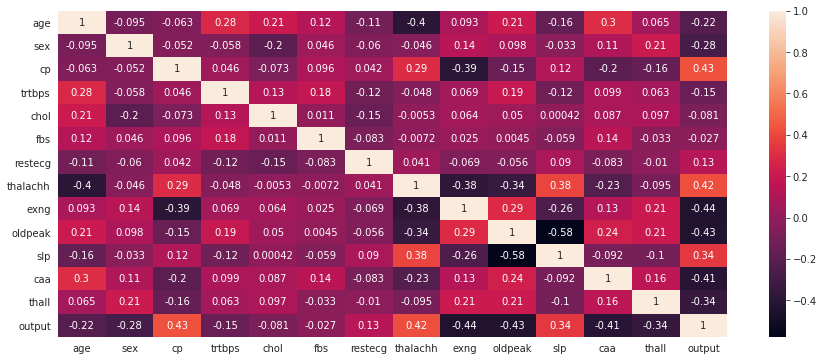

In [10]:
plt.figure(figsize= (15,6))
sns.set_style("darkgrid")
sns.heatmap(data.corr(),annot= True)
plt.show()

In [11]:
ax = px.pie(data, names= "output",template= "plotly_dark",title= "chances of heart attack",hole= 0.5)
ax.show()
#Около 54% пациентов в наборе данных имеют вероятность сердечного приступа

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


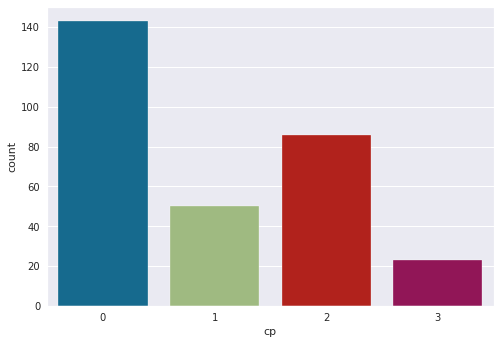

In [38]:
x=(data.cp.value_counts())
print(x)
p = sns.countplot(data=data, x="cp")
plt.show()
#У людей боль в груди типа 0, то есть «Типичная стенокардия» является самой высокой.
#У людей возникает боль в груди 3-го типа, Бессимптомная - самая низкая.
#Также можно наблюдать людей с болью в груди типа 0 почти у 50% всех людей. 

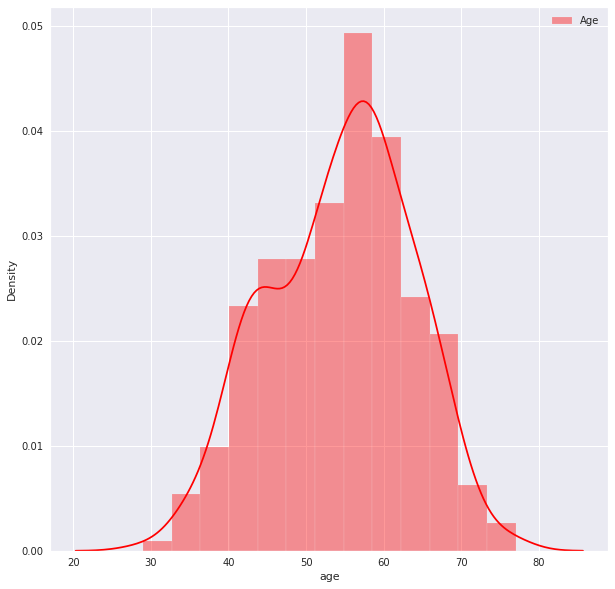

In [39]:
plt.figure(figsize=(10,10))
sns.distplot(data.age, color="red", label="Age", kde= True)
plt.legend()

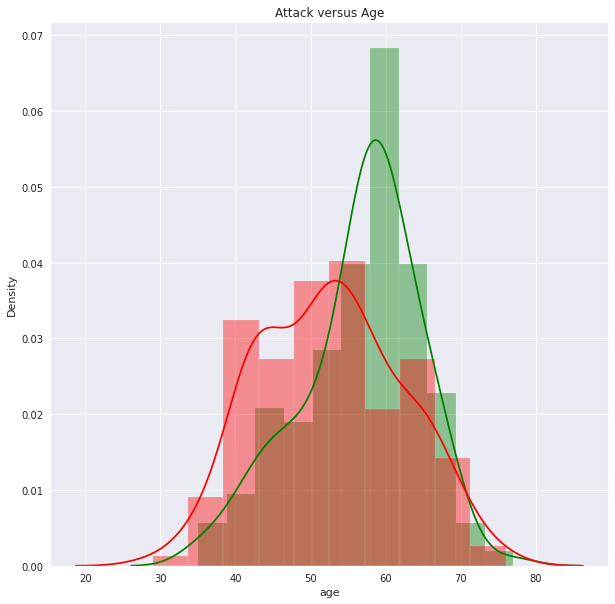

In [40]:
plt.figure(figsize=(10,10))
sns.distplot(data[data['output'] == 0]["age"], color='green',kde=True,) 
sns.distplot(data[data['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()

In [41]:
label= data["output"]
train= data.drop("output",axis= 1)
x_train,x_test,y_train,y_test= train_test_split(train,label,test_size= 0.2,random_state= 4)

In [42]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB



models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(x_train, y_train)
    model_results = model.predict(x_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [43]:
finalResults[:10]

[('RF', 0.8886904761904761),
 ('NuSVC', 0.8665413533834586),
 ('ADA', 0.8648018648018647),
 ('LR', 0.8564189189189189),
 ('Ridge', 0.8523809523809525),
 ('BNB', 0.8426773455377574),
 ('GNB', 0.8181318681318681),
 ('XGB', 0.8006535947712419),
 ('PAC', 0.7872340425531915),
 ('Perc', 0.7851648351648352)]